              precision    recall  f1-score   support

           0       0.94      0.65      0.77      1762
           1       0.21      0.70      0.33       238

    accuracy                           0.66      2000
   macro avg       0.58      0.67      0.55      2000
weighted avg       0.85      0.66      0.72      2000



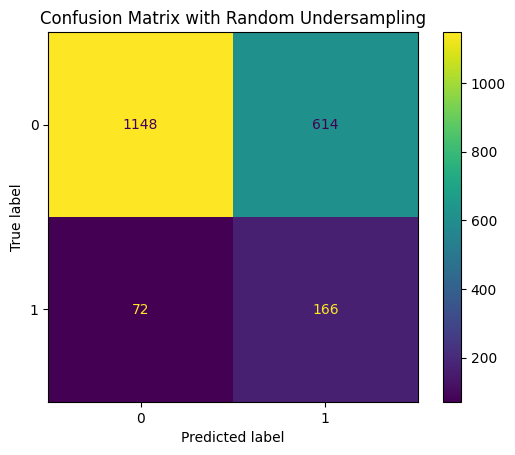

In [1]:
'''final version using undersampling'''


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn

# Load data
data = pd.read_csv('/content/Loan_default.csv', nrows=10000).drop("LoanID", axis=1)  # Adjust file path as necessary

# Define preprocessing for numeric and categorical features
numeric_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the SVM Classifier
svm = SVC(C=0.5, kernel='rbf', class_weight='balanced')  # Adjust class weights for sensitivity

# Create a pipeline that includes preprocessing, RandomUnderSampler, and the SVM classifier
pipeline = make_pipeline_imblearn(
    preprocessor,
    RandomUnderSampler(random_state=42),  # RandomUnderSampler for handling class imbalance
    svm
)

# Split the dataset into training and testing sets
X = data.drop('Default', axis=1)
y = data['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict using the test set
y_pred = pipeline.predict(X_test)

# Output the classification report to evaluate the model
print(classification_report(y_test, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix with Random Undersampling')
plt.show()
